In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

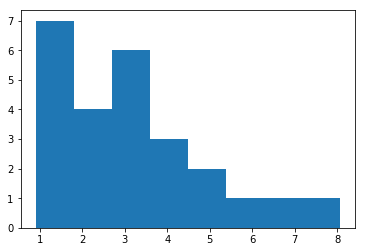

In [3]:
x = np.array([ 1.00201077,  1.58251956,  0.94515919,  6.48778002,  1.47764604,
        5.18847071,  4.21988095,  2.85971522,  3.40044437,  3.74907745,
        1.18065796,  3.74748775,  3.27328568,  3.19374927,  8.0726155 ,
        0.90326139,  2.34460034,  2.14199217,  3.27446744,  3.58872357,
        1.20611533,  2.16594393,  5.56610242,  4.66479977,  2.3573932 ])
_ = plt.hist(x, bins = 8)

In [4]:
precip = pd.read_table('https://raw.githubusercontent.com/fonnesbeck/statistical-analysis-python-tutorial/master/data/nashville_precip.txt', index_col = 0, na_values = 'NA', delim_whitespace = True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


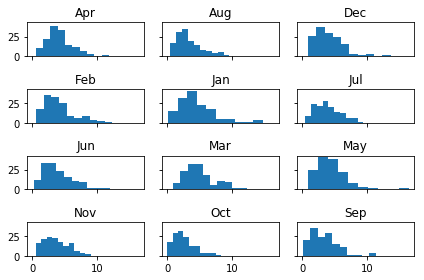

In [5]:
_ = precip.hist(sharex = True, sharey = True, grid = False)
plt.tight_layout()

In [6]:
precip.fillna(value = {'Oct' : precip.Oct.mean()}, inplace = True)

In [7]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [8]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [9]:
alpha_mom = precip_mean**2/precip_var
beta_mom = precip_var/precip_mean

In [10]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

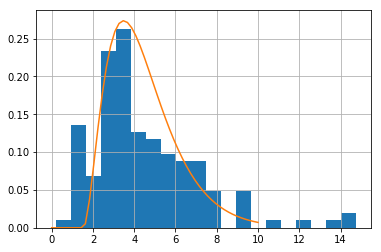

In [11]:
from scipy.stats import gamma

precip.Jan.hist(density = True, bins = 20)
plt.plot(np.linspace(0,10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

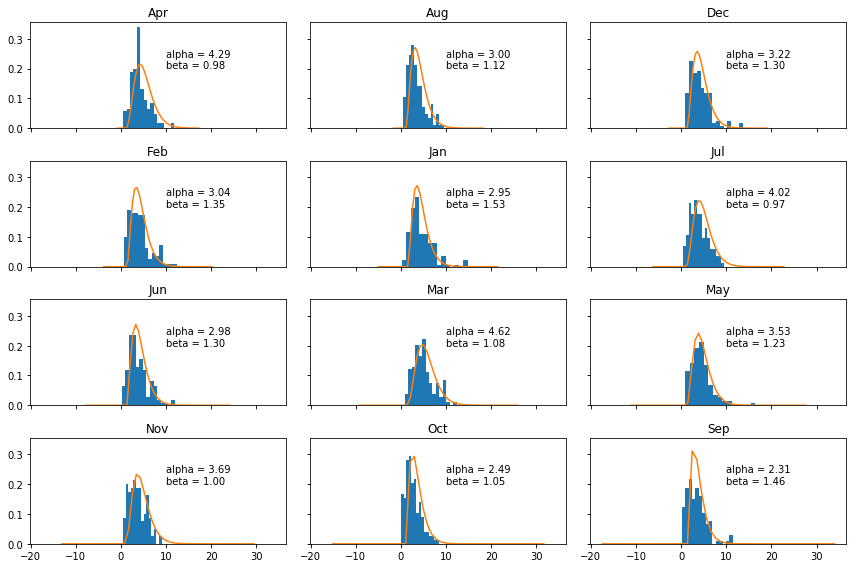

In [12]:
axs = precip.hist(density = True, figsize = (12,8), sharex = True, sharey = True, bins = 15, grid = False)

for ax in axs.ravel():
    m = ax.get_title()
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy = (10, 0.2))

plt.tight_layout()

Text(0, 0.5, 'P(y)')

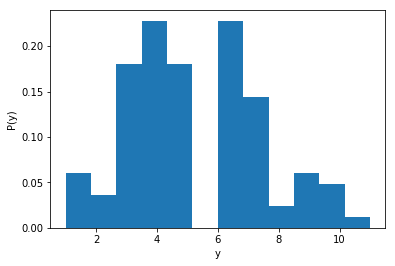

In [13]:
y = np.random.poisson(5, size = 100)
plt.hist(y, bins = 12, density = True)
plt.xlabel('y');plt.ylabel('P(y)')

In [14]:
poisson_like = lambda x,lam: np.exp(-lam)*(lam ** x)/(np.arange(x) + 1).prod()
lam = 6
value = 10
poisson_like(value, lam)

0.041303093412337726

In [15]:
np.sum(poisson_like(yi, lam) for yi in y)

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


11.941700869481267

??


In [16]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in y)

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


8.229131749170794

Text(0, 0.5, 'L($\\lambda$|x=5)')

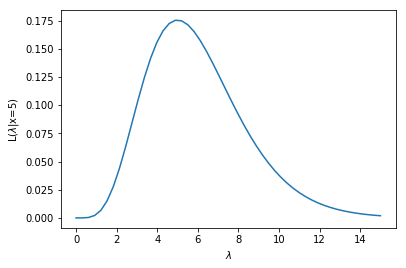

In [17]:
lambdas = np.linspace(0, 15)
x = 5
plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x))

Text(0, 0.5, 'Pr(X|$\\lambda$=5)')

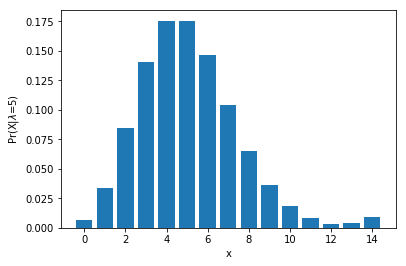

In [18]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

In [19]:
from scipy.optimize import newton

Text(2.3706070287539935, -0.2, '$x_{n+1}$')

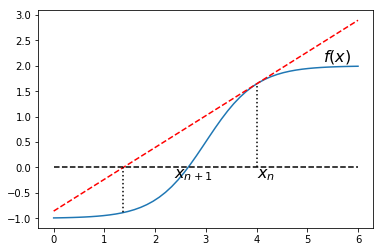

In [20]:
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize = 16)
plt.plot([0,6], [0,0], 'k--')
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize = 16)
tanline = lambda x : -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+1., -.2, '$x_{n+1}$', fontsize = 16)

In [21]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [22]:
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

In [23]:
alpha_mle = newton(dlgamma, 2, dl2gamma, args = (log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399616

In [24]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.8426160754841373

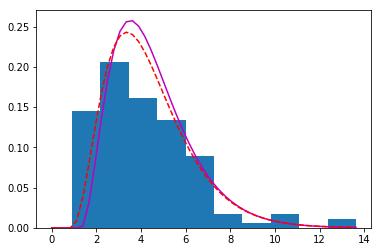

In [25]:
dec = precip.Dec
dec.hist(density = True, bins = 10, grid = False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]),'m-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [26]:
from scipy.stats import gamma
gamma.fit(precip.Dec)

(2.242751775315231, 0.6549460447018862, 1.570073932063466)

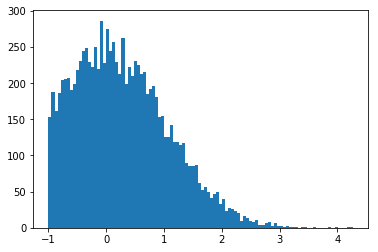

In [31]:
x = np.random.normal(size = 10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size = x_small.sum())
    x_small = x < a

_ = plt.hist(x, bins = 100)

In [32]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

from scipy.optimize import fmin

fmin(trunc_norm, np.array([1,2]), args = (-1, x))

Optimization terminated successfully.
         Current function value: 11065.423755
         Iterations: 42
         Function evaluations: 83


array([-0.01711591,  1.01464651])

In [33]:
y = np.random.random(15) * 10
y

array([8.43798697, 1.2790072 , 7.965314  , 1.88879239, 3.81772897,
       5.28997242, 4.77991274, 0.89000532, 3.52361442, 8.05916416,
       2.89030236, 5.99409455, 9.92317832, 3.38109527, 4.28433192])

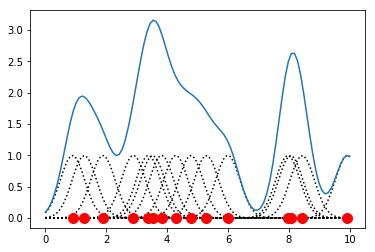

In [34]:
x = np.linspace(0, 10, 100)
s = 0.4
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms = 10)

In [35]:
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)
x = np.r_[x1, x2]

(array([0.02795176, 0.0111807 , 0.03913247, 0.05590352, 0.07826493,
        0.16212022, 0.15652987, 0.02795176]),
 array([-6.85058651, -5.0617905 , -3.27299449, -1.48419848,  0.30459753,
         2.09339354,  3.88218955,  5.67098557,  7.45978158]),
 <a list of 8 Patch objects>)

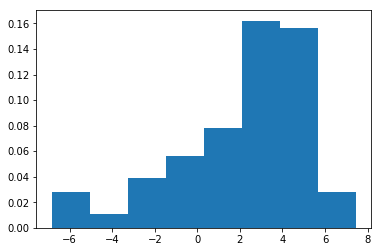

In [36]:
plt.hist(x, bins = 8, density = True)

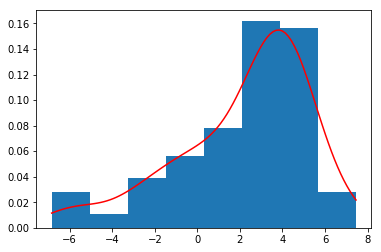

In [37]:
from scipy.stats import kde
density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins = 8, density = True)
plt.plot(xgrid, density(xgrid), 'r-')

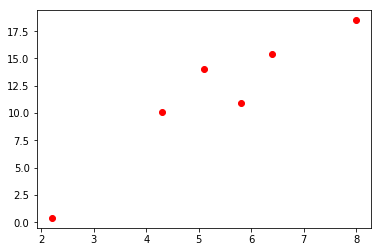

In [38]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,'ro')

In [39]:
ss = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x)**2)

In [40]:
ss([0,1], x, y)

333.35

In [42]:
b0, b1 = fmin(ss, [0,1], args = (x, y))
b0, b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.350013603887088, 3.0000002915386412)

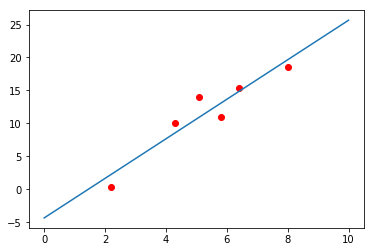

In [43]:
plt.plot(x, y, 'ro')
plt.plot([0, 10], [b0, b0+b1*10])

(0, 20)

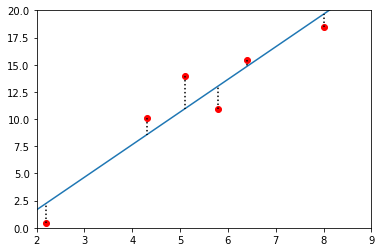

In [44]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x, y):
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 9); plt.ylim(0, 20)

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77
0.0015717044449411344 2.3123174318112456


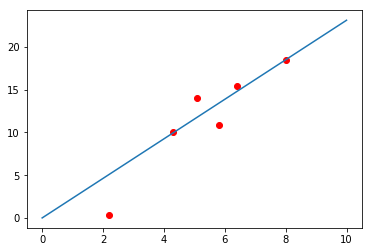

In [45]:
sabs = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))
b0, b1  = fmin(sabs, [0,1], args = (x, y))
print(b0, b1)
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
-11.074818603916224 6.05769759480417 -0.3026810570883315


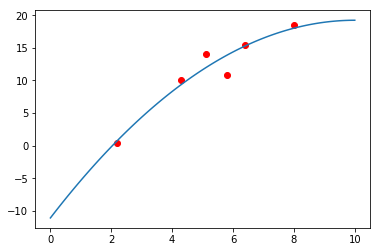

In [46]:
ss2 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2))**2)
b0, b1, b2 = fmin(ss2, [1,1,-1], args = (x, y))
print(b0, b1, b2)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Optimization terminated successfully.
         Current function value: 4274.128398
         Iterations: 230
         Function evaluations: 407


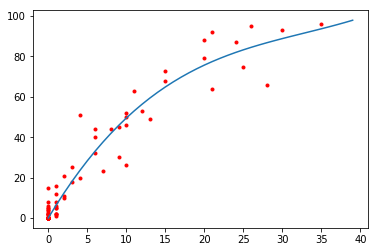

In [47]:
ss3 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)
bb = pd.read_csv('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/raw/master/data/baseball.csv', index_col = 0)
plt.plot(bb.hr, bb.rbi, 'r.')
b0,b1,b2,b3 = fmin(ss3, [0,1,-1,0], args = (bb.hr, bb.rbi))
xvals = np.arange(40)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

In [48]:
import statsmodels.api as sm
straight_line = sm.OLS(y, sm.add_constant(x)).fit()
straight_line.summary()

C:\Users\aikan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     32.67
Date:                Thu, 28 Mar 2019   Prob (F-statistic):            0.00463
Time:                        03:42:38   Log-Likelihood:                -12.325
No. Observations:                   6   AIC:                             28.65
Df Residuals:                       4   BIC:                             28.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3500      2.937     -1.481      0.213     -12.505       3.805
x1             3.0000      0.525      5.716      0.005       1.543       4.457
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.387
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.570
Skew:                           0.359   Prob(JB):                        0.752
Kurtosis:                       1.671   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from statsmodels.formula.api import ols as OLS

data = pd.DataFrame(dict(x = x, y = y))
cubic_fit = OLS('y ~ x + I(x**2)', data).fit()

cubic_fit.summary()

C:\Users\aikan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     19.50
Date:                Thu, 28 Mar 2019   Prob (F-statistic):             0.0191
Time:                        03:44:57   Log-Likelihood:                -11.056
No. Observations:                   6   AIC:                             28.11
Df Residuals:                       3   BIC:                             27.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0748      6.013     -1.842      0.163     -30.211       8.062
x              6.0577      2.482      2.441      0.092      -1.840      13.955
I(x ** 2)     -0.3027      0.241     -1.257      0.298      -1.069       0.464
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.711
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.655
Skew:                          -0.809   Prob(JB):                        0.721
Kurtosis:                       2.961   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Optimization terminated successfully.
         Current function value: 7.015262
         Iterations: 663
         Function evaluations: 983


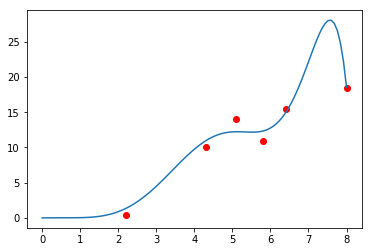

In [50]:
def calc_poly(params, data):
    x = np.c_[[data ** i for i in range(len(params))]]
    return np.dot(params, x)

ssp = lambda theta, x, y: np.sum((y - calc_poly(theta, x))**2)
betas = fmin(ssp, np.zeros(10), args = (x, y), maxiter = 1e6)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, max(x), 100)
plt.plot(xvals, calc_poly(betas, xvals))

In [53]:
n = len(x)
aic = lambda rss, p, n: n * np.log(rss/(n-p-1)) + 2*p

RRS1 = ss(fmin(ss, [0,1], args = (x, y)), x, y)
RRS2 = ss2(fmin(ss2, [1,1,-1], args = (x, y)), x, y)
print(aic(RRS1, 2, n), aic(RRS2, 3, n))

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
15.781658357173654 17.675936801895737


In [55]:
titanic = pd.read_excel('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/data/titanic.xls?raw=true', "titanic")
titanic.name

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
                              ...                        
1297                               Wiseman, Mr. Phillippe
1298                            Wittevrongel, Mr. Camille
1299                                  Yasbeck, Mr. Antoni
1300              Yasbeck, Mrs. Antoni (Selini Alexander)
1301          

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 0, 'log(fare)')

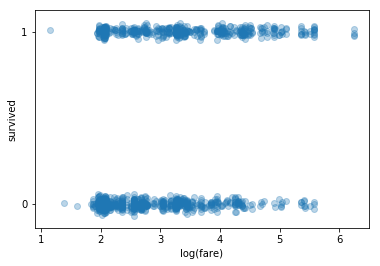

In [58]:
jitter = np.random.normal(scale = 0.02, size = len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha = 0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")

In [60]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(ss, [1,1], args = (x, y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


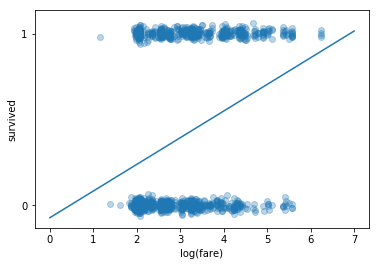

In [61]:
jitter = np.random.normal(scale = 0.02, size = len(titanic))
plt.scatter(np.log(titanic.fare),titanic.survived + jitter, alpha = 0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")
plt.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


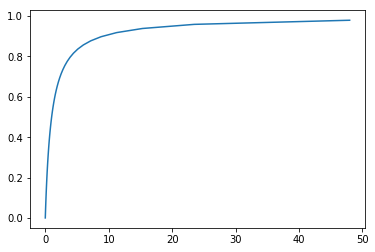

In [62]:
logit = lambda p : np.log(p/(1. - p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1. - unit_interval), unit_interval)

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


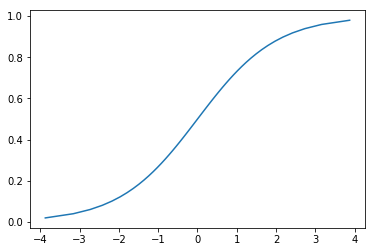

In [63]:
plt.plot(logit(unit_interval), unit_interval)

In [64]:
invlogit = lambda x : 1./(1 + np.exp(-x))

def logistic_like(theta, x, y):
    p = invlogit(theta[0] + theta[1]*x)
    return -np.sum(y * np.log(p) + (1-y)*np.log(1-p))

In [65]:
x, y = titanic[titanic.fare.notnull()][['fare','survived']].values.T

In [66]:
b0, b1 = fmin(logistic_like, [0.5, 0], args = (x, y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.8823898452833819, 0.012452067664164127)

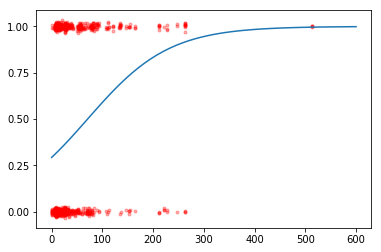

In [67]:
jitter = np.random.normal(scale = 0.01, size = len(x))
plt.plot(x, y+jitter, 'r.', alpha = 0.3)
plt.yticks([0,.25,.5,.75,1])
xvals = np.linspace(0,600)
plt.plot(xvals, invlogit(b0+b1*xvals))

In [68]:
logistic = sm.GLM(y, sm.add_constant(x), family = sm.families.Binomial()).fit()
logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1308
Model:                            GLM   Df Residuals:                     1306
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -827.02
Date:                Sun, 31 Mar 2019   Deviance:                       1654.0
Time:                        01:21:09   Pearson chi2:                 1.33e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8824      0.076    -11.684      0.000      -1.030      -0.734
x1             0.0125      0.002      7.762      0.000       0.009       0.016
==============================================================================
"""

In [69]:
np.random.permutation(titanic.name)[:5]

array(['Harper, Mrs. Henry Sleeper (Myna Haxtun)',
       'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
       'Johansson, Mr. Nils', 'Bateman, Rev. Robert James',
       'Crosby, Capt. Edward Gifford'], dtype=object)

In [70]:
random_int = np.random.randint(0, len(titanic), 5)
titanic.name[random_int]

496             Matthews, Mr. William John
513    Nasser, Mrs. Nicholas (Adele Achem)
721                       Coleff, Mr. Peju
696                     Cacic, Miss. Manda
624      Andersson, Miss. Ellis Anna Maria
Name: name, dtype: object

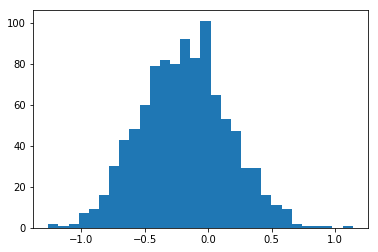

In [71]:
n = 10
R = 1000
x = np.random.normal(size = n)
s = [x[np.random.randint(0, n, n)].mean() for i in range(R)]
_ = plt.hist(s, bins  = 30)

In [72]:
boot_mean =  np.sum(s)/R
boot_var = ((np.array(s) - boot_mean)**2).sum()/(R - 1)
boot_mean, boot_var

(-0.18699037172039867, 0.12054511045551823)

In [73]:
boot_mean = np.mean(x)

In [74]:
boot_mean

-0.1811109829347378

In [76]:
s_sorted = np.sort(s)
s_sorted[:10]

array([-1.2589718 , -1.25181522, -1.16885178, -1.0912014 , -1.0213719 ,
       -1.01282738, -1.01282192, -1.00022991, -0.99442018, -0.97442046])

In [78]:
s_sorted[-10:]

array([0.61562663, 0.6244089 , 0.63082457, 0.63494664, 0.67312389,
       0.68843199, 0.74857352, 0.85171265, 0.91553277, 1.13670976])

In [79]:
alpha = 0.05
s_sorted[[(R+1)*alpha/2, (R+1)*(1 - alpha/2)]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices